## Base Model -Decision Tree

In [24]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# load the data
final_df = pd.read_csv('final_df.csv')

# Modeling

## Split the data into training and testing sets

In [27]:
# Assign the data to independent and dependent variables
X = final_df.drop(['TARGET'],axis=1)
y = final_df['TARGET']

In [28]:
# Split the data into training and testing sets and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [29]:
# Check the shape of the datasets
X_train.shape,X_test.shape

((215257, 259), (92254, 259))

## Create an instance of the DecisionTreeClassifier class

In [30]:
# Create an instance of the DecisionTreeClassifier class
dt = DecisionTreeClassifier()

In [7]:
# Set the hyperparameters to tune
criterion = ['gini','entropy']
max_depth = np.arange(2,20,4)
params = {'criterion':criterion,'max_depth':max_depth}

## Hyperparameter Tuning

In [8]:
# Create the GridSearchCV object and set the parameters to be used in the GridSearchCV object and cross-validation to be used in the GridSearchCV object
grid = GridSearchCV(dt,params,cv=5,scoring= 'roc_auc',n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer

In [9]:
# Fit the GridSearchCV object to the training data
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  6, 10, 14, 18])},
             scoring='roc_auc')

In [10]:
# Get the best estimator from the GridSearchCV object
best_est = grid.best_estimator_
best_est

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [11]:
# Plug the best estimator into the DecisionTreeClassifier object and fit it to the training data
dt = dt.set_params(criterion='entropy',max_depth =6)

In [12]:
# Fit the DecisionTreeClassifier object to the training data
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

## Evaluate the model

In [13]:
# Plot the confusion matrix and classification report for the test data
cf_matrix = confusion_matrix(y_test,y_pred)

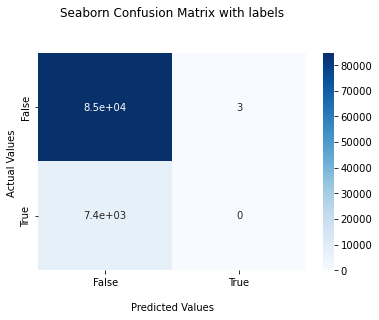

In [14]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     92251
         1.0       0.00      0.00      0.00         3

    accuracy                           0.92     92254
   macro avg       0.50      0.46      0.48     92254
weighted avg       1.00      0.92      0.96     92254



## Resampling to combat with imbalanced distribution of target column

In [14]:
# Import the necessary packages
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpip
from imblearn.under_sampling import RandomUnderSampler

### SMOTE

In [21]:
# define pipeline
steps = [('over', SMOTE()), ('dt', DecisionTreeClassifier(criterion='entropy',max_depth =6))]
pipeline = imbpip(steps=steps)

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

In [33]:
y_pred = pipeline.predict(X_test)

In [34]:
cf_matrix = confusion_matrix(y_pred,y_test)

#### Evaluate the model

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     84806
         1.0       0.13      0.46      0.21      7448

    accuracy                           0.71     92254
   macro avg       0.54      0.60      0.51     92254
weighted avg       0.87      0.71      0.77     92254



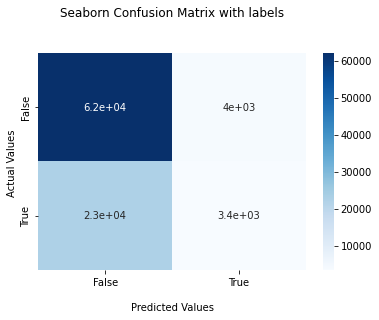

In [36]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### SMOTE + Under Sampling

In [37]:
# Construct the pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('dt', DecisionTreeClassifier(criterion='entropy',max_depth =6))]
pipeline = imbpip(steps=steps)

In [38]:
# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

In [39]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [40]:
# Evaluate the model
cf_matrix = confusion_matrix(y_pred,y_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     84806
         1.0       0.23      0.30      0.26      7448

    accuracy                           0.86     92254
   macro avg       0.59      0.61      0.59     92254
weighted avg       0.88      0.86      0.87     92254



#### Evaluate the model

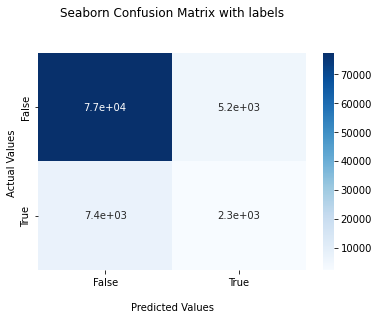

In [42]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()